# 海域等高线图绘制

根据附件中的海水深度数据，绘制海域的等高线图，帮助分析地形特征。

海域范围：南北长5海里，东西宽4海里

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取海域深度数据
data = pd.read_excel('附件.xlsx')
print("数据形状:", data.shape)
print("\n数据的前几行:")
print(data.head())
print("\n数据统计信息:")
print(data.describe())

数据形状: (252, 203)

数据的前几行:
            海水深度/m  Unnamed: 1  横向坐标/NM（由西向东）  Unnamed: 3  Unnamed: 4  \
0              NaN         NaN           0.00        0.02        0.04   
1  纵向坐标/NM\n（由南向北）        0.00          24.40       24.12       23.85   
2              NaN        0.02          24.32       24.04       23.77   
3              NaN        0.04          24.25       23.97       23.70   
4              NaN        0.06          24.17       23.89       23.63   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0        0.06        0.08        0.10        0.12        0.14  ...   
1       23.59       23.34       23.10       22.88       22.67  ...   
2       23.51       23.27       23.03       22.81       22.60  ...   
3       23.44       23.19       22.96       22.74       22.53  ...   
4       23.37       23.13       22.89       22.67       22.46  ...   

   Unnamed: 193  Unnamed: 194  Unnamed: 195  Unnamed: 196  Unnamed: 197  \
0          3.82          3.84          

In [3]:
# 重新读取数据，正确解析坐标和深度信息
data = pd.read_excel('附件.xlsx')

# 提取横向坐标（从第1行，列索引2开始）
x_coords = data.iloc[0, 2:].values.astype(float)  # 横向坐标（东西方向）
print("横向坐标范围:", x_coords.min(), "到", x_coords.max(), "海里")

# 提取纵向坐标（从第2行开始，列索引1）
y_coords = data.iloc[1:, 1].values.astype(float)  # 纵向坐标（南北方向）
print("纵向坐标范围:", y_coords.min(), "到", y_coords.max(), "海里")

# 提取深度数据（从第2行开始，列索引2开始）
depth_data = data.iloc[1:, 2:].values.astype(float)
print("深度数据形状:", depth_data.shape)
print("深度范围:", np.nanmin(depth_data), "到", np.nanmax(depth_data), "米")

# 创建坐标网格
X, Y = np.meshgrid(x_coords, y_coords)
print("\n网格形状:", X.shape, Y.shape)

横向坐标范围: 0.0 到 4.0 海里
纵向坐标范围: 0.0 到 5.0 海里
深度数据形状: (251, 201)
深度范围: 20.0 到 197.2 米

网格形状: (251, 201) (251, 201)


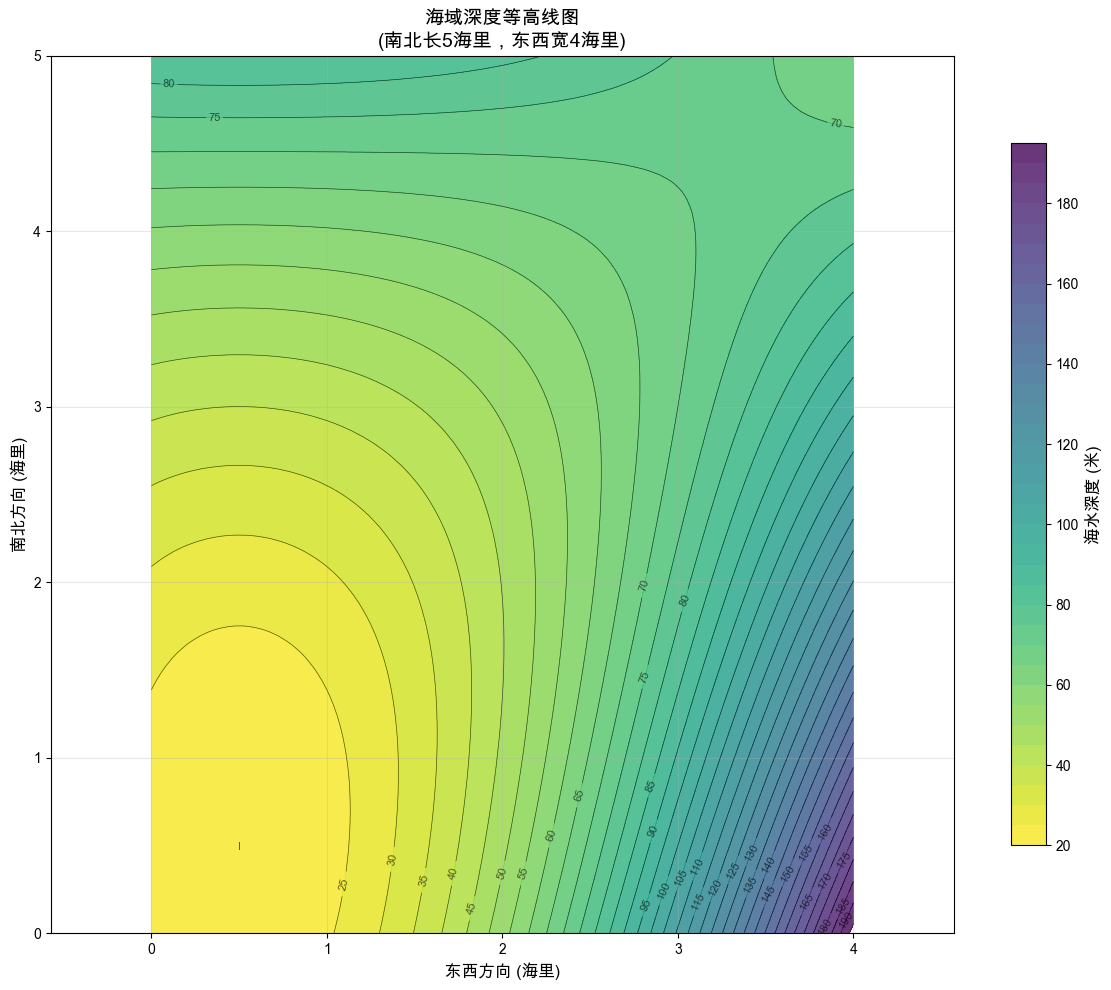

海域基本信息：
海域范围: 东西宽 4.0 海里, 南北长 5.0 海里
最浅水深: 20.0 米
最深水深: 197.2 米
平均水深: 62.5 米


In [4]:
# 绘制海域等高线图
plt.figure(figsize=(12, 10))

# 创建等高线图
levels = np.arange(20, 200, 5)  # 每5米一个等高线
contour = plt.contour(X, Y, depth_data, levels=levels, colors='black', alpha=0.6, linewidths=0.5)
contourf = plt.contourf(X, Y, depth_data, levels=levels, cmap='viridis_r', alpha=0.8)

# 添加等高线标签
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.0f')

# 添加颜色条
cbar = plt.colorbar(contourf, shrink=0.8)
cbar.set_label('海水深度 (米)', fontsize=12)

# 设置坐标轴
plt.xlabel('东西方向 (海里)', fontsize=12)
plt.ylabel('南北方向 (海里)', fontsize=12)
plt.title('海域深度等高线图\n(南北长5海里，东西宽4海里)', fontsize=14, fontweight='bold')

# 设置网格
plt.grid(True, alpha=0.3)

# 设置坐标轴比例
plt.axis('equal')

# 显示图形
plt.tight_layout()
plt.show()

# 输出一些统计信息
print("海域基本信息：")
print(f"海域范围: 东西宽 {x_coords.max() - x_coords.min():.1f} 海里, 南北长 {y_coords.max() - y_coords.min():.1f} 海里")
print(f"最浅水深: {np.nanmin(depth_data):.1f} 米")
print(f"最深水深: {np.nanmax(depth_data):.1f} 米")
print(f"平均水深: {np.nanmean(depth_data):.1f} 米")

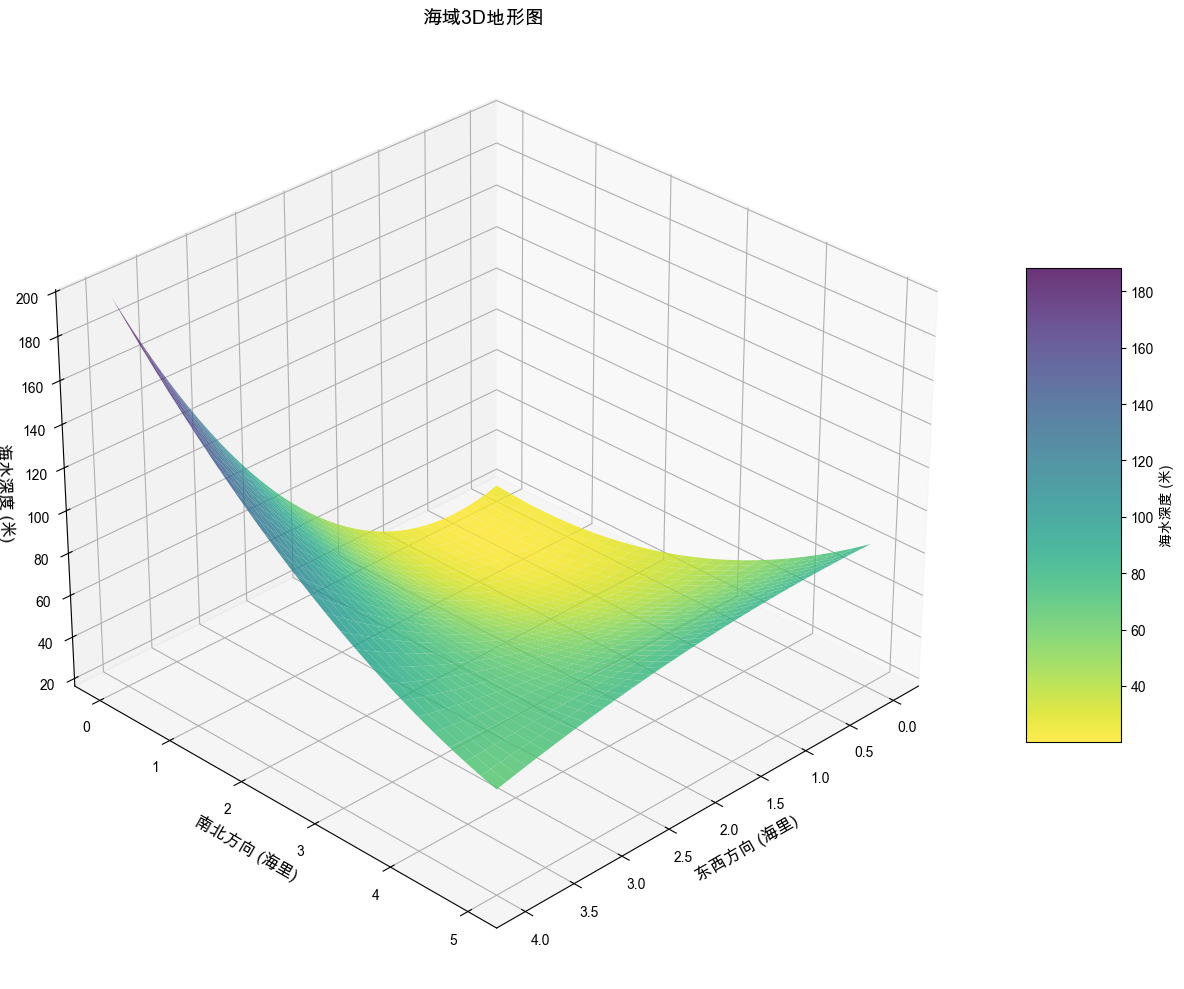

In [5]:
# 创建3D海底地形图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 为了更好的可视化效果，我们对数据进行降采样
step = 5  # 每5个点取一个
X_3d = X[::step, ::step]
Y_3d = Y[::step, ::step]
Z_3d = depth_data[::step, ::step]

# 创建3D表面图
surf = ax.plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis_r', alpha=0.8, 
                      linewidth=0, antialiased=True)

# 设置标签和标题
ax.set_xlabel('东西方向 (海里)', fontsize=12)
ax.set_ylabel('南北方向 (海里)', fontsize=12)
ax.set_zlabel('海水深度 (米)', fontsize=12)
ax.set_title('海域3D地形图', fontsize=14, fontweight='bold')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5, label='海水深度 (米)')

# 设置视角
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

=== 海域地形特征分析 ===

1. 深度分布统计:
   最浅水深: 20.0 米
   最深水深: 197.2 米
   平均水深: 62.5 米
   水深标准差: 29.8 米

2. 地形坡度分析:
   平均坡度: 0.54
   最大坡度: 2.18
   坡度标准差: 0.40

3. 分区域深度分析:
   西北区域平均水深: 29.4 米
   东北区域平均水深: 92.2 米
   西南区域平均水深: 56.9 米
   东南区域平均水深: 71.3 米

4. 测线设计建议:
   - 海域东南部最深，西南部相对较浅
   - 从等高线图可以看出，地形从西南向东南逐渐加深
   - 坡度变化较大的区域需要更密集的测线
   - 建议测线方向为东西向，可以更好地捕捉南北方向的深度变化


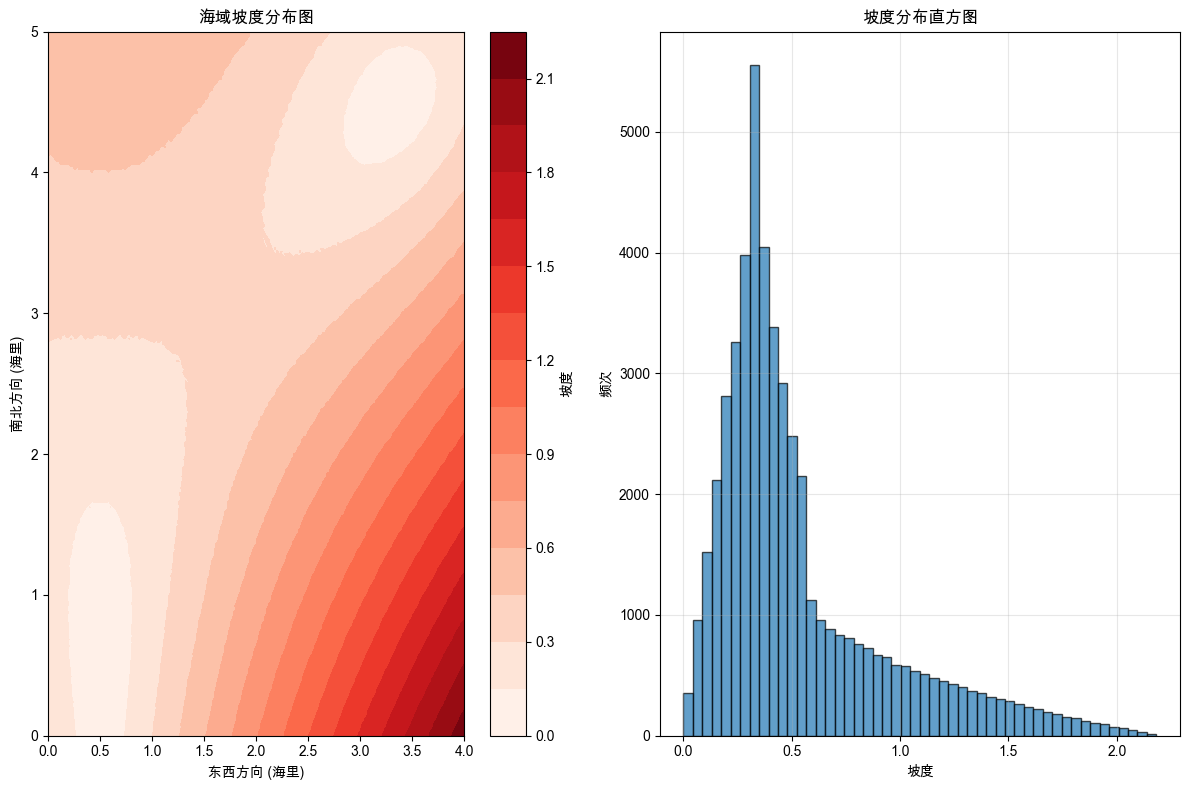

In [6]:
# 海域地形特征分析
print("=== 海域地形特征分析 ===\n")

# 1. 深度分布分析
depth_flat = depth_data.flatten()
depth_flat = depth_flat[~np.isnan(depth_flat)]

print("1. 深度分布统计:")
print(f"   最浅水深: {np.min(depth_flat):.1f} 米")
print(f"   最深水深: {np.max(depth_flat):.1f} 米")
print(f"   平均水深: {np.mean(depth_flat):.1f} 米")
print(f"   水深标准差: {np.std(depth_flat):.1f} 米")

# 2. 地形坡度分析
# 计算梯度（坡度）
dy, dx = np.gradient(depth_data)
slope = np.sqrt(dx**2 + dy**2)
slope_flat = slope.flatten()
slope_flat = slope_flat[~np.isnan(slope_flat)]

print(f"\n2. 地形坡度分析:")
print(f"   平均坡度: {np.mean(slope_flat):.2f}")
print(f"   最大坡度: {np.max(slope_flat):.2f}")
print(f"   坡度标准差: {np.std(slope_flat):.2f}")

# 3. 海域分区域分析
print(f"\n3. 分区域深度分析:")
# 将海域分为4个象限
mid_x, mid_y = len(x_coords)//2, len(y_coords)//2

# 西北区域
nw_depths = depth_data[:mid_y, :mid_x]
print(f"   西北区域平均水深: {np.nanmean(nw_depths):.1f} 米")

# 东北区域  
ne_depths = depth_data[:mid_y, mid_x:]
print(f"   东北区域平均水深: {np.nanmean(ne_depths):.1f} 米")

# 西南区域
sw_depths = depth_data[mid_y:, :mid_x]
print(f"   西南区域平均水深: {np.nanmean(sw_depths):.1f} 米")

# 东南区域
se_depths = depth_data[mid_y:, mid_x:]
print(f"   东南区域平均水深: {np.nanmean(se_depths):.1f} 米")

# 4. 测线设计建议
print(f"\n4. 测线设计建议:")
print("   - 海域东南部最深，西南部相对较浅")
print("   - 从等高线图可以看出，地形从西南向东南逐渐加深")
print("   - 坡度变化较大的区域需要更密集的测线")
print("   - 建议测线方向为东西向，可以更好地捕捉南北方向的深度变化")

# 绘制坡度分布图
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, slope, levels=20, cmap='Reds')
plt.colorbar(label='坡度')
plt.title('海域坡度分布图')
plt.xlabel('东西方向 (海里)')
plt.ylabel('南北方向 (海里)')

plt.subplot(1, 2, 2)
plt.hist(slope_flat, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('坡度')
plt.ylabel('频次')
plt.title('坡度分布直方图')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 基于坡度和方向趋同度的区域分区

根据思路文档中的数学模型，实现海域的自适应分区算法

In [7]:
# 1. 计算等高线方向
def calculate_contour_direction(dx, dy):
    """
    计算等高线方向（垂直于梯度方向）
    """
    # 避免除零错误
    dy_safe = np.where(np.abs(dy) < 1e-10, 1e-10, dy)
    
    # 计算等高线方向角度
    theta = np.arctan(dx / dy_safe) + np.pi/2
    
    # 将角度标准化到 [0, π] 范围
    theta = np.mod(theta, np.pi)
    
    return theta

# 2. 计算方向趋同度
def calculate_direction_coherence(theta, window_size=5):
    """
    计算局部区域内方向的趋同度
    """
    coherence = np.zeros_like(theta)
    half_window = window_size // 2
    
    for i in range(half_window, theta.shape[0] - half_window):
        for j in range(half_window, theta.shape[1] - half_window):
            # 提取局部窗口
            local_theta = theta[i-half_window:i+half_window+1, 
                             j-half_window:j+half_window+1]
            
            # 计算角度的圆形标准差（考虑角度的周期性）
            cos_mean = np.mean(np.cos(2 * local_theta))
            sin_mean = np.mean(np.sin(2 * local_theta))
            circular_std = np.sqrt(-2 * np.log(np.sqrt(cos_mean**2 + sin_mean**2)))
            
            # 趋同度 = 1 - 标准化的圆形标准差
            coherence[i, j] = 1 - np.tanh(circular_std)
    
    return coherence

# 3. 分区权重函数
def calculate_zoning_weight(slope, direction_coherence, alpha=0.6, beta=0.4, gamma=2.0):
    """
    计算分区权重函数 W(x,y) = α·f_s(S) + β·f_d(θ)
    """
    # 坡度权重函数 f_s(S) = tanh(γ·S)
    slope_weight = np.tanh(gamma * slope)
    
    # 分区权重
    zoning_weight = alpha * slope_weight + beta * direction_coherence
    
    return zoning_weight, slope_weight

# 计算等高线方向
theta = calculate_contour_direction(dx, dy)

# 计算方向趋同度  
direction_coherence = calculate_direction_coherence(theta)

# 计算分区权重
zoning_weight, slope_weight = calculate_zoning_weight(slope, direction_coherence)

print("等高线方向和分区权重计算完成")
print(f"等高线方向范围: {np.nanmin(theta):.3f} - {np.nanmax(theta):.3f} 弧度")
print(f"方向趋同度范围: {np.nanmin(direction_coherence):.3f} - {np.nanmax(direction_coherence):.3f}")
print(f"分区权重范围: {np.nanmin(zoning_weight):.3f} - {np.nanmax(zoning_weight):.3f}")

等高线方向和分区权重计算完成
等高线方向范围: 0.000 - 3.142 弧度
方向趋同度范围: 0.000 - 1.000
分区权重范围: 0.018 - 0.998


In [8]:
# 4. 基于权重进行分区
def perform_zoning(zoning_weight, slope, n_zones=4):
    """
    基于分区权重进行区域划分
    """
    # 定义分区阈值
    weight_thresholds = np.quantile(zoning_weight[~np.isnan(zoning_weight)], 
                                   np.linspace(0, 1, n_zones+1))
    
    # 初始化分区
    zones = np.zeros_like(zoning_weight)
    
    for i in range(n_zones):
        if i == 0:
            mask = zoning_weight <= weight_thresholds[i+1]
        elif i == n_zones-1:
            mask = zoning_weight > weight_thresholds[i]
        else:
            mask = (zoning_weight > weight_thresholds[i]) & (zoning_weight <= weight_thresholds[i+1])
        zones[mask] = i + 1
    
    return zones, weight_thresholds

# 进行分区
zones, thresholds = perform_zoning(zoning_weight, slope, n_zones=4)

# 分区统计
print("=== 区域分区结果 ===")
for i in range(1, 5):
    zone_mask = zones == i
    zone_area = np.sum(zone_mask)
    zone_slope_mean = np.mean(slope[zone_mask])
    zone_coherence_mean = np.mean(direction_coherence[zone_mask])
    
    print(f"\n区域 {i}:")
    print(f"  面积占比: {zone_area/np.sum(~np.isnan(zones))*100:.1f}%")
    print(f"  平均坡度: {zone_slope_mean:.3f}")
    print(f"  平均方向趋同度: {zone_coherence_mean:.3f}")
    print(f"  权重范围: {thresholds[i-1]:.3f} - {thresholds[i]:.3f}")

# 定义分区特性
zone_characteristics = {
    1: "低坡度低趋同区 - 规则网格测线",
    2: "低坡度高趋同区 - 稀疏等高线测线", 
    3: "高坡度低趋同区 - 自适应密集测线",
    4: "高坡度高趋同区 - 严格等高线测线"
}

print(f"\n=== 测线设计策略 ===")
for i in range(1, 5):
    print(f"区域 {i}: {zone_characteristics[i]}")

=== 区域分区结果 ===

区域 1:
  面积占比: 25.0%
  平均坡度: 0.247
  平均方向趋同度: 0.740
  权重范围: 0.018 - 0.666

区域 2:
  面积占比: 25.0%
  平均坡度: 0.327
  平均方向趋同度: 0.953
  权重范围: 0.666 - 0.777

区域 3:
  面积占比: 25.0%
  平均坡度: 0.485
  平均方向趋同度: 0.977
  权重范围: 0.777 - 0.905

区域 4:
  面积占比: 25.0%
  平均坡度: 1.092
  平均方向趋同度: 0.988
  权重范围: 0.905 - 0.998

=== 测线设计策略 ===
区域 1: 低坡度低趋同区 - 规则网格测线
区域 2: 低坡度高趋同区 - 稀疏等高线测线
区域 3: 高坡度低趋同区 - 自适应密集测线
区域 4: 高坡度高趋同区 - 严格等高线测线


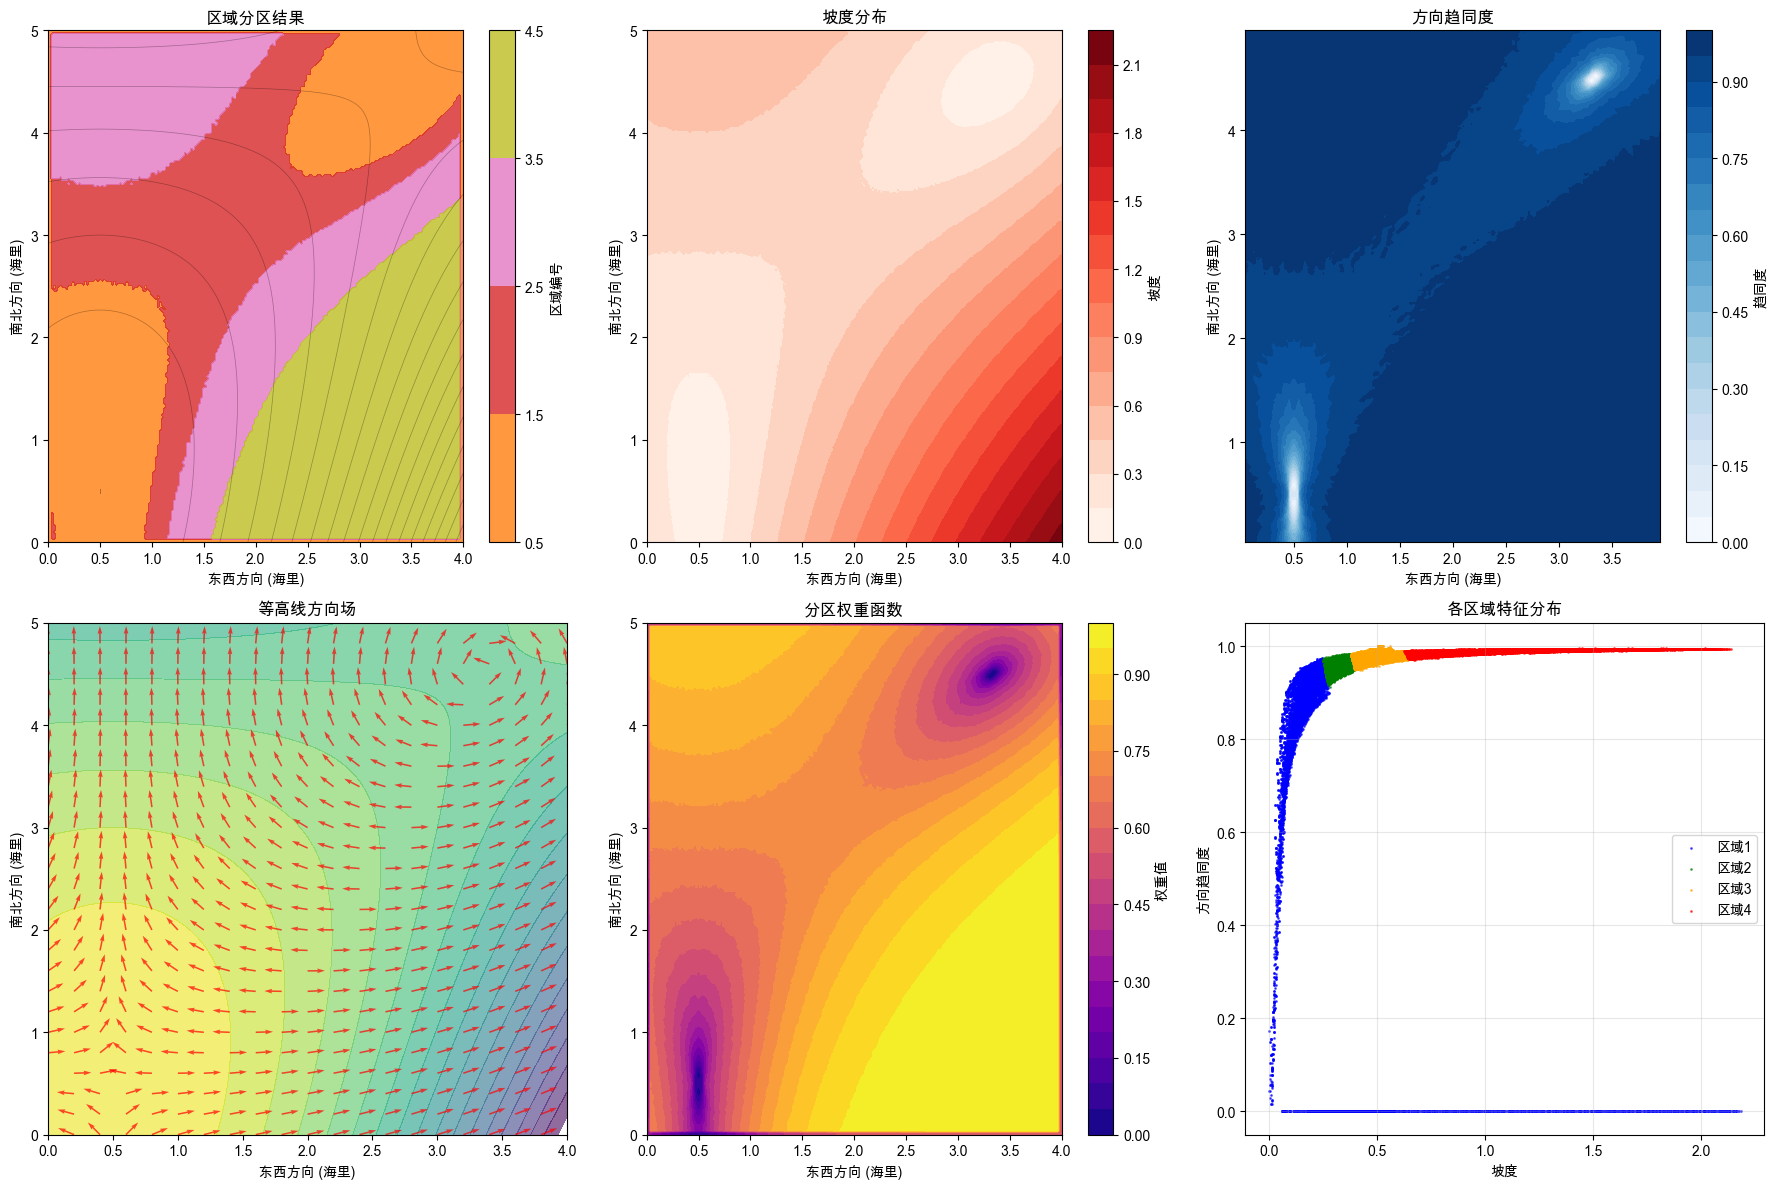


=== 分区效果验证 ===
区域1：坡度小、趋同度较低 - 适合规则网格
区域2：坡度小、趋同度高 - 适合稀疏等高线
区域3：坡度中等、趋同度高 - 适合密集等高线
区域4：坡度大、趋同度高 - 必须严格沿等高线


In [9]:
# 5. 可视化分区结果
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 分区结果图
im1 = axes[0,0].contourf(X, Y, zones, levels=np.arange(0.5, 5.5, 1), 
                        cmap='tab10', alpha=0.8)
axes[0,0].contour(X, Y, depth_data, levels=np.arange(20, 200, 10), 
                 colors='black', alpha=0.3, linewidths=0.5)
axes[0,0].set_title('区域分区结果')
axes[0,0].set_xlabel('东西方向 (海里)')
axes[0,0].set_ylabel('南北方向 (海里)')
plt.colorbar(im1, ax=axes[0,0], label='区域编号')

# 坡度分布图
im2 = axes[0,1].contourf(X, Y, slope, levels=20, cmap='Reds')
axes[0,1].set_title('坡度分布')
axes[0,1].set_xlabel('东西方向 (海里)')
axes[0,1].set_ylabel('南北方向 (海里)')
plt.colorbar(im2, ax=axes[0,1], label='坡度')

# 方向趋同度图
im3 = axes[0,2].contourf(X[2:-2, 2:-2], Y[2:-2, 2:-2], direction_coherence[2:-2, 2:-2], 
                        levels=20, cmap='Blues')
axes[0,2].set_title('方向趋同度')
axes[0,2].set_xlabel('东西方向 (海里)')
axes[0,2].set_ylabel('南北方向 (海里)')
plt.colorbar(im3, ax=axes[0,2], label='趋同度')

# 等高线方向图
# 创建方向箭头（降采样显示）
step_arrow = 10
X_arrow = X[::step_arrow, ::step_arrow]
Y_arrow = Y[::step_arrow, ::step_arrow]
U_arrow = np.cos(theta[::step_arrow, ::step_arrow])
V_arrow = np.sin(theta[::step_arrow, ::step_arrow])

axes[1,0].contourf(X, Y, depth_data, levels=np.arange(20, 200, 10), 
                  cmap='viridis_r', alpha=0.6)
axes[1,0].quiver(X_arrow, Y_arrow, U_arrow, V_arrow, 
                scale=30, alpha=0.7, color='red', width=0.003)
axes[1,0].set_title('等高线方向场')
axes[1,0].set_xlabel('东西方向 (海里)')
axes[1,0].set_ylabel('南北方向 (海里)')

# 分区权重图
im5 = axes[1,1].contourf(X, Y, zoning_weight, levels=20, cmap='plasma')
axes[1,1].set_title('分区权重函数')
axes[1,1].set_xlabel('东西方向 (海里)')
axes[1,1].set_ylabel('南北方向 (海里)')
plt.colorbar(im5, ax=axes[1,1], label='权重值')

# 各区域坡度-趋同度散点图
colors = ['blue', 'green', 'orange', 'red']
for i in range(1, 5):
    zone_mask = zones == i
    if np.sum(zone_mask) > 0:
        axes[1,2].scatter(slope[zone_mask], direction_coherence[zone_mask], 
                         c=colors[i-1], alpha=0.6, s=1, label=f'区域{i}')

axes[1,2].set_xlabel('坡度')
axes[1,2].set_ylabel('方向趋同度')
axes[1,2].set_title('各区域特征分布')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== 分区效果验证 ===")
print("区域1：坡度小、趋同度较低 - 适合规则网格")
print("区域2：坡度小、趋同度高 - 适合稀疏等高线") 
print("区域3：坡度中等、趋同度高 - 适合密集等高线")
print("区域4：坡度大、趋同度高 - 必须严格沿等高线")